In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(541909, 8)

In [ ]:
#Count unique values per column and list the top 10 most frequent values in a categorical field.
df.nunique()


,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [ ]:
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df=df.dropna(subset =["Description"])

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133626
Country,0


In [ ]:
numeric_columns = (['Quantity', 'UnitPrice'])
df[numeric_columns].describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
# Check for zero or negative values in ALL numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df_cleaned = df[(df[numeric_columns] > 0).all(axis=1)]

for col in numeric_columns:
    invalid_count = (df[col] <= 0).sum()
    if invalid_count > 0:
        print(f"{col}: {invalid_count} rows with zero or negative values")

Quantity: 9762 rows with zero or negative values
UnitPrice: 1063 rows with zero or negative values


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
bins = [0, 30, 60, 100]
labels = ['Young', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Young
4,5,Female,31,17,40,Adult


In [ ]:
#Create a new categorical column from numeric data using conditional statements.
def categorize_age(age):
    if age < 18:
        return "Teen"
    elif age < 30:
        return "Young Adult"
    elif age < 55:
        return "Middle Age"
    else:
        return "Senior"

data["age_group"] = data["Age"].apply(categorize_age)

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,age_group
0,1,Male,19,15,39,Young,Young Adult
1,2,Male,21,15,81,Young,Young Adult
2,3,Female,20,16,6,Young,Young Adult
3,4,Female,23,16,77,Young,Young Adult
4,5,Female,31,17,40,Adult,Middle Age


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Age_Group,0
age_group,0


In [ ]:
# rename only selected columns
data = data.rename(columns={
    'Spending Score(1-100)': 'spending_score',
    'Annual Income(k$)': 'annual_income'
})

In [ ]:
data['Spending_category'] = pd.qcut(data['Spending Score (1-100)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])


In [ ]:
print(data.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Age_Group', 'age_group',
       'Spending_category'],
      dtype='object')


In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,age_group,Spending_category
0,1,Male,19,15,39,Young,Young Adult,Medium-Low
1,2,Male,21,15,81,Young,Young Adult,High
2,3,Female,20,16,6,Young,Young Adult,Low
3,4,Female,23,16,77,Young,Young Adult,High
4,5,Female,31,17,40,Adult,Middle Age,Medium-Low


In [ ]:
# Scaling the numeric columns
scaler = StandardScaler()
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# we scale numeric features in order to make sure all features contribute equally when applying models.

In [ ]:
# computing average income in relations to gender.
Avg_income = data.groupby('Annual Income (k$)')['Genre']

In [ ]:
# Calculate max, min, and mean for numeric columns per group.
data.groupby("Genre")[numeric_columns].agg(["min", "max", "mean"])



Annual Income (k$)                     Spending Score (1-100)  \
                      min       max      mean                    min   
Genre                                                                  
Female          -1.700830  2.497807 -0.050002              -1.754735   
Male            -1.738999  2.917671  0.063639              -1.910021   

                            
             max      mean  
Genre                       
Female  1.894492  0.051508  
Male    1.816849 -0.065555

In [ ]:
# Create a new ratio feature (e.g., income-to-age).
data["income_to_age_ratio"] = data["Annual Income (k$)"] / data["Age"]

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,age_group,Spending_category,income_to_age_ratio
0,1,Male,19,-1.738999,-0.434801,Young,Young Adult,Medium-Low,-0.091526
1,2,Male,21,-1.738999,1.195704,Young,Young Adult,High,-0.082809
2,3,Female,20,-1.700830,-1.715913,Young,Young Adult,Low,-0.085041
3,4,Female,23,-1.700830,1.040418,Young,Young Adult,High,-0.073949
4,5,Female,31,-1.662660,-0.395980,Adult,Middle Age,Medium-Low,-0.053634


In [ ]:
# Calculate averages
avg_income = data["Annual Income (k$)"].mean()
avg_spending = data["Spending Score (1-100)"].mean()

# Create flag
data["HighValueCustomer"] = (
    (data["Annual Income (k$)"] > avg_income) &
    (data["Spending Score (1-100)"] > avg_spending)
)
data["HighValueCustomer"] = data["HighValueCustomer"].map({True: "Yes", False: "No"})

In [ ]:
# Compute correlation between numeric features.
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

                        Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)                1.000000                0.009903
Spending Score (1-100)            0.009903                1.000000


In [ ]:
# Determine which gender has a higher average spending score.
avg_spend = data.groupby("Genre")["Spending Score (1-100)"].mean()
avg_spend.idxmax()




'Female'

In [ ]:
# Create a pivot table by age group and gender for average spending.


pivot_table = data.pivot_table(
    index = "age_group",
    columns = "Genre",
    values = "Spending Score (1-100)",
    aggfunc = "mean"
)
print(pivot_table)

Genre          Female      Male
age_group                      
Middle Age  -0.024715 -0.071291
Senior      -0.328042 -0.503818
Young Adult  0.395177  0.247562


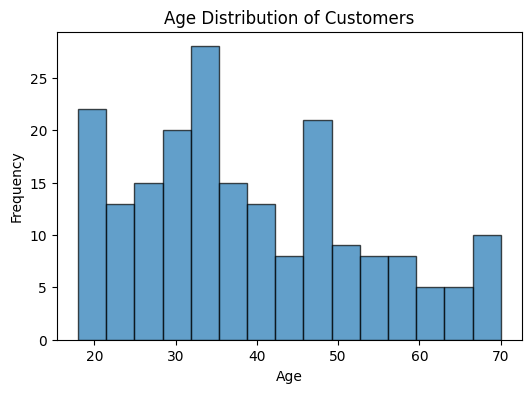

In [ ]:
#

plt.figure(figsize=(6,4))
plt.hist(data['Age'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


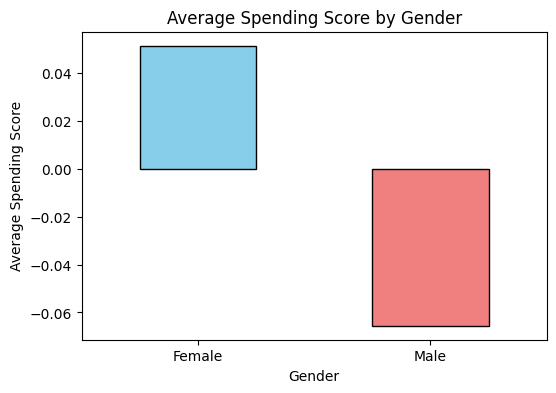

In [ ]:

# Plot
plt.figure(figsize=(6,4))
avg_spend.plot(kind="bar", color=["skyblue", "lightcoral"], edgecolor="black")
plt.title("Average Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

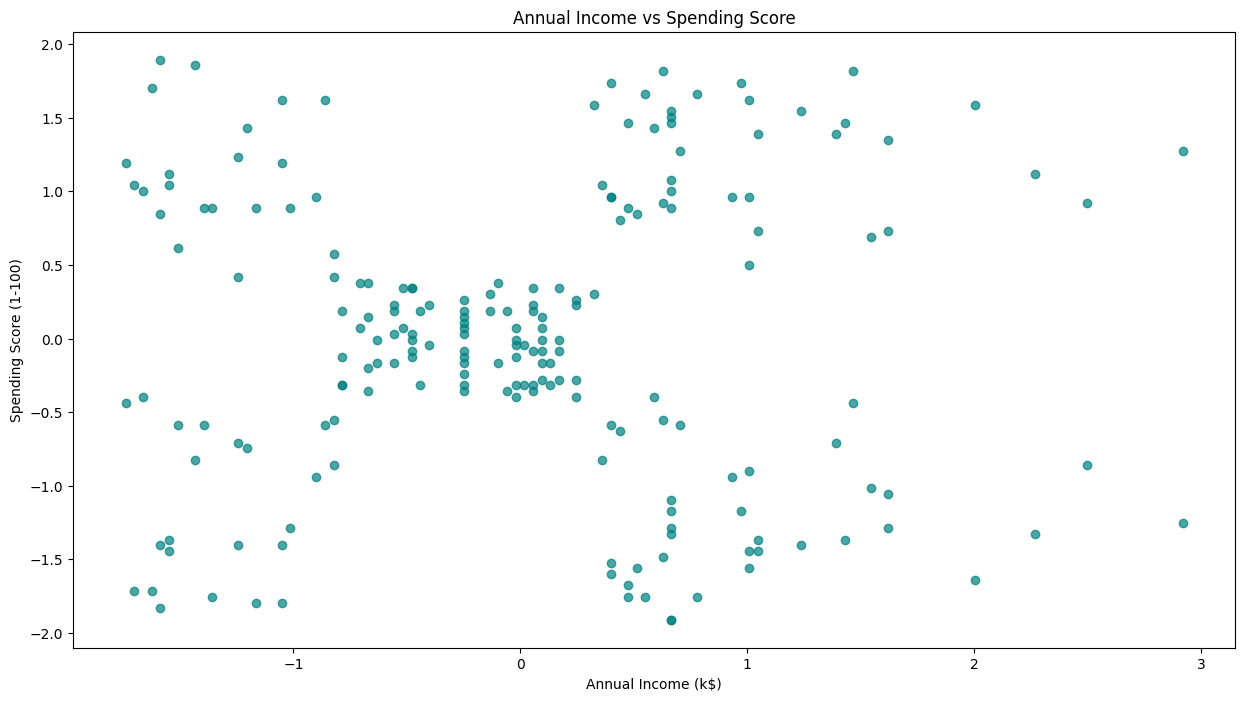

In [ ]:
# Create a scatter plot of Annual Income vs Spending Score.
plt.figure(figsize=(15,8))
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], alpha=0.7, c="teal")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

/tmp/ipython-input-1918316631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age_Group', y='Spending Score (1-100)', palette="Set2")


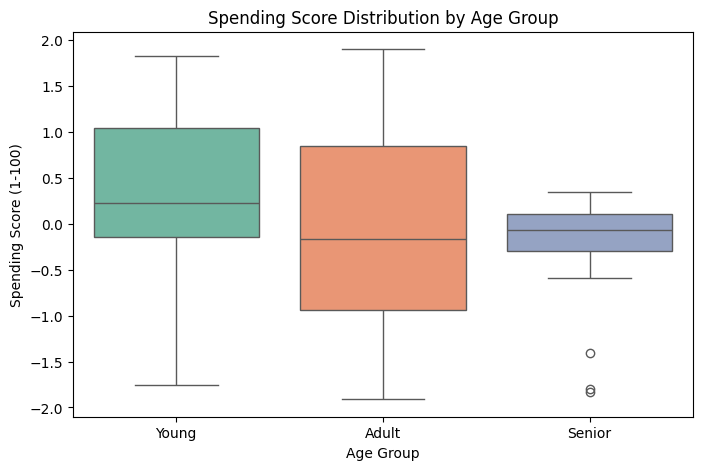

In [ ]:
# Create a boxplot of spending score grouped by age bins.
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Age_Group', y='Spending Score (1-100)', palette="Set2")

plt.title("Spending Score Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.show()

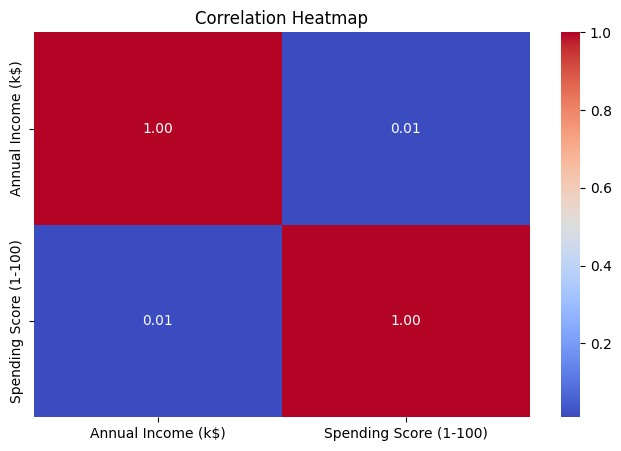

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## DIMENSIONALITY REDUCTION(t-SNE)

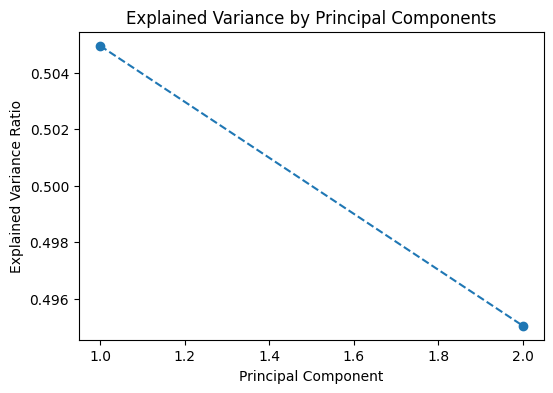

In [ ]:
# Run PCA on standardized income and spending features and plot explained variance.
pca = PCA(n_components = 2)
x = data[numeric_columns]
reduced = pca.fit_transform(x)

# Get explained variance ratio
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


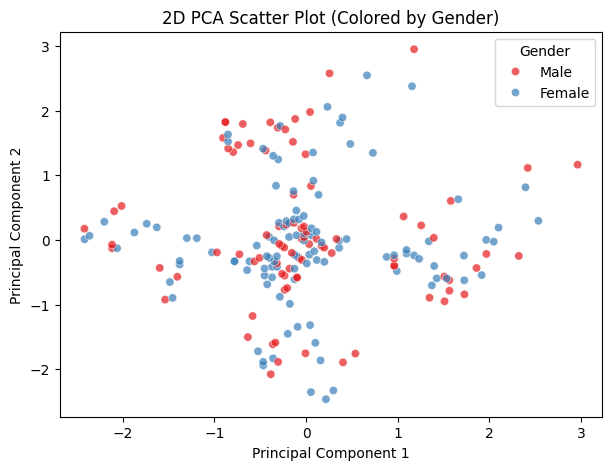

In [ ]:
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(reduced, columns=['PC1', 'PC2'])
pca_df['Genre'] = data['Genre'].values  # add category back

# Plot scatter
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Genre', alpha=0.7, palette='Set1')

plt.title("2D PCA Scatter Plot (Colored by Gender)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Gender")
plt.show()

In [ ]:
# fitted the t-SNE for visualizing nonlinear structures
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
x_embedded = tsne.fit_transform(x)

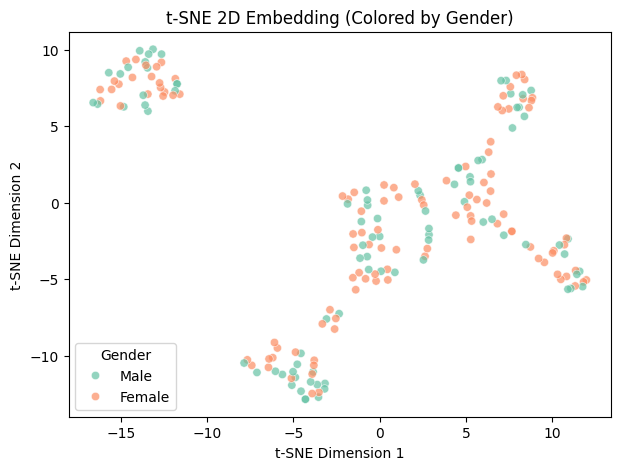

In [ ]:
# Created a DataFrame for visualization of the fitted columns
tsne_df = pd.DataFrame(x_embedded, columns=['TSNE1', 'TSNE2'])
tsne_df['Genre'] = data['Genre'].values
plt.figure(figsize=(7,5))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Genre', alpha=0.7, palette='Set2')
plt.title("t-SNE 2D Embedding (Colored by Gender)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Gender")
plt.show()


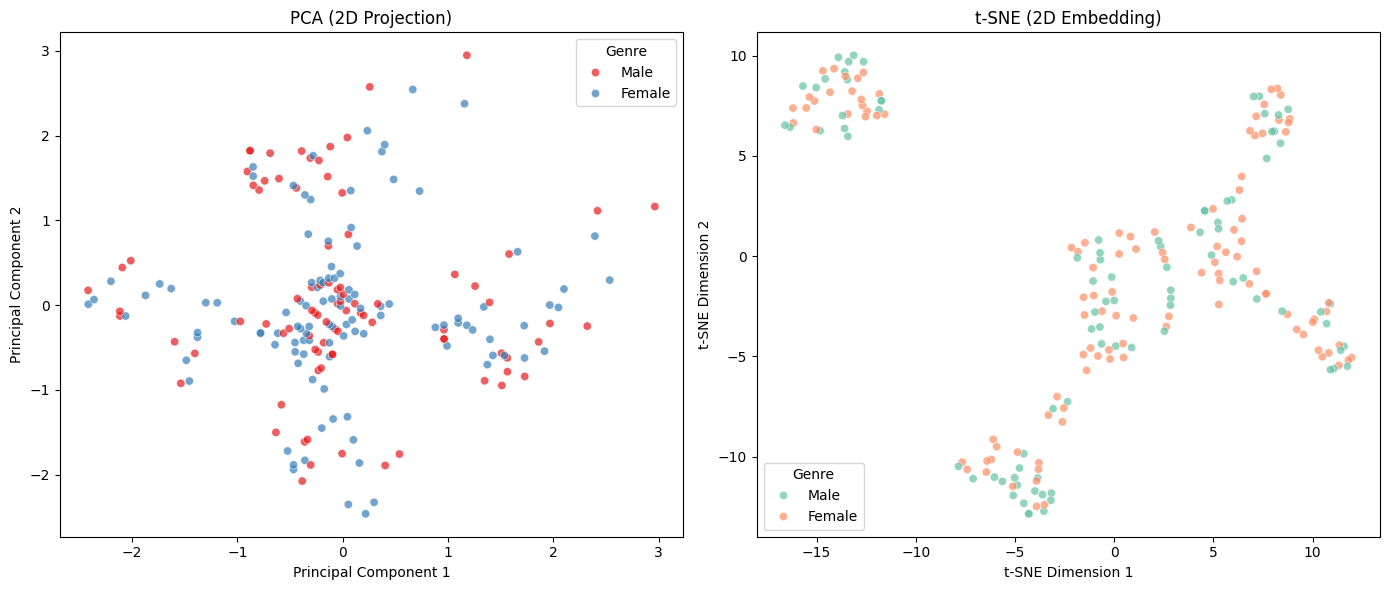

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# PCA plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Genre', alpha=0.7, palette='Set1', ax=axes[0])
axes[0].set_title("PCA (2D Projection)")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# t-SNE plot
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Genre', alpha=0.7, palette='Set2', ax=axes[1])
axes[1].set_title("t-SNE (2D Embedding)")
axes[1].set_xlabel("t-SNE Dimension 1")
axes[1].set_ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()

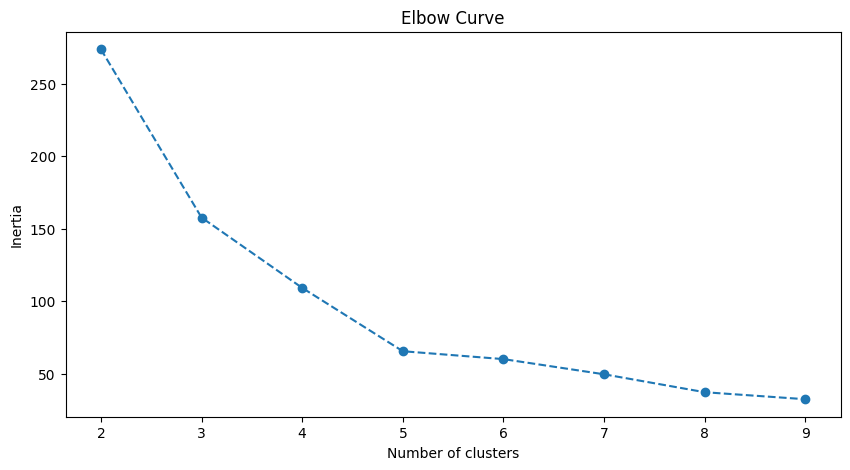

In [ ]:
# Ran k-means for k=2…10 on standardized features and plotted the elbow curve.
inertias = []
k_range = range(2,10)
for k in k_range:
  kmeans = KMeans(n_clusters = k,random_state = 42)
  kmeans.fit(x)
  inertias.append(kmeans.inertia_)


plt.figure(figsize=(10,5))
plt.plot(k_range, inertias, marker = 'o', linestyle = '--')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


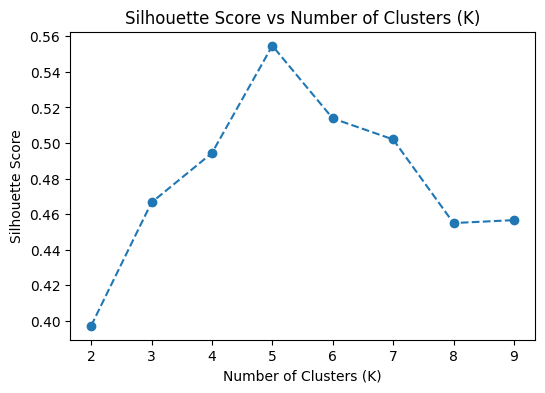

In [ ]:
# computed a silhouette score for each k...this is to identify the best k
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


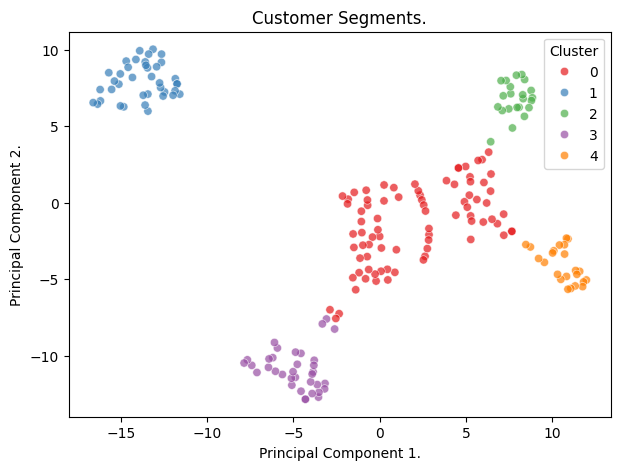

In [ ]:
# Final model fitting.
model = KMeans(n_clusters = 5, random_state = 42)
labels = model.fit_predict(x)
data['Cluster'] = labels #adding cluster labels back to the dataset
tsne_df['Cluster']= labels #added cluster labels to the plot that showed clear clusters.

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette="Set1", alpha=0.7)
plt.title("Customer Segments.")
plt.xlabel("Principal Component 1.")
plt.ylabel("Principal Component 2.")
plt.legend(title="Cluster")
plt.show()


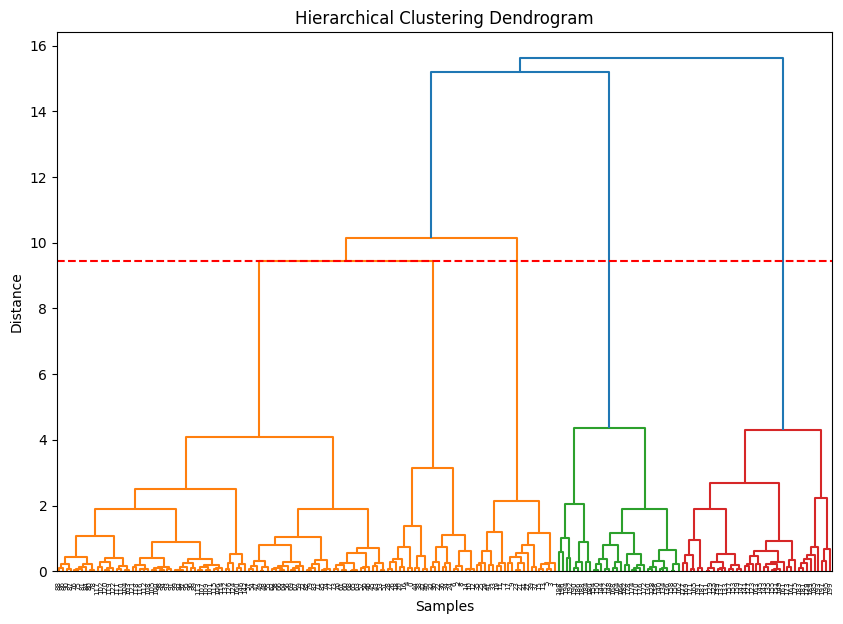

In [ ]:
linked = linkage(x, 'ward')
cluster_labels = fcluster(linked, 5, criterion='maxclust')
plt.figure(figsize=(10,7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)

# Draw horizontal line at the cut level for 5 clusters
plt.axhline(y=linked[-(5-1), 2], color='red', linestyle='--')

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,age_group,Spending_category,income_to_age_ratio,HighValueCustomer,Cluster
0,1,Male,19,-1.738999,-0.434801,Young,Young Adult,Medium-Low,-0.091526,No,4
1,2,Male,21,-1.738999,1.195704,Young,Young Adult,High,-0.082809,No,2
2,3,Female,20,-1.700830,-1.715913,Young,Young Adult,Low,-0.085041,No,4
3,4,Female,23,-1.700830,1.040418,Young,Young Adult,High,-0.073949,No,2
4,5,Female,31,-1.662660,-0.395980,Adult,Middle Age,Medium-Low,-0.053634,No,4


In [ ]:
# Add KMeans cluster labels to original data
data["Clusters"] =labels

# Profile each cluster
cluster_profile = data.groupby("Clusters")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

print(cluster_profile)

                Age  Annual Income (k$)  Spending Score (1-100)
Clusters                                                       
0         42.716049           -0.200913               -0.026456
1         32.692308            0.991583                1.239503
2         25.272727           -1.329545                1.132178
3         41.114286            1.055003               -1.284439
4         45.217391           -1.307519               -1.136965


In [ ]:
# Countin the no. of customers in each label.
cluster_sizes = data["Cluster"].value_counts().sort_index()
print("KMeans cluster sizes:\n", cluster_sizes)


KMeans cluster sizes:
 Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


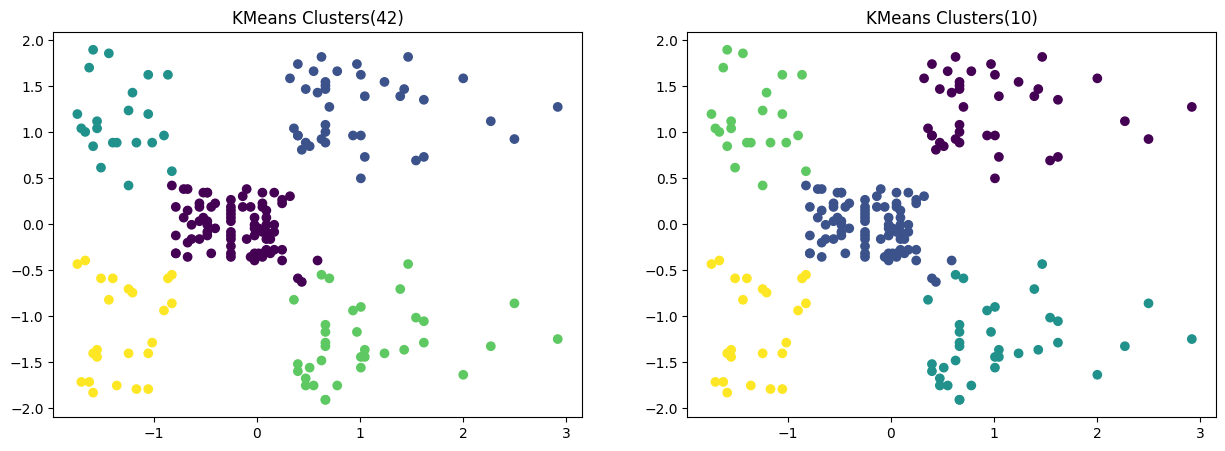

In [ ]:
#finding out if changing the randm state can change the position of the allocated centroids
results = {}

for seed in [0, 10, 21, 42, 100]:
    model = KMeans(n_clusters=5, random_state=seed, n_init=10)
    labels = model.fit_predict(x)
    results[seed] = labels

# Visualizing if there is a difference in allocation of centroids
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x["Annual Income (k$)"], x["Spending Score (1-100)"],
            c=results[42])
plt.title("KMeans Clusters(42)")

plt.subplot(1,2,2)
plt.scatter(x["Annual Income (k$)"], x["Spending Score (1-100)"],
            c=results[10])
plt.title("KMeans Clusters(10)")
plt.show()

Even with different random states the allocation of centroids to the 5 clusters is still the same positionally.

In [ ]:
## Unscaling my data
data[numeric_columns] = scaler.inverse_transform(data[numeric_columns])

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,age_group,Spending_category,income_to_age_ratio,HighValueCustomer,Cluster,Clusters
0,1,Male,19,15.0,39.0,Young,Young Adult,Medium-Low,-0.091526,No,4,4
1,2,Male,21,15.0,81.0,Young,Young Adult,High,-0.082809,No,2,2
2,3,Female,20,16.0,6.0,Young,Young Adult,Low,-0.085041,No,4,4
3,4,Female,23,16.0,77.0,Young,Young Adult,High,-0.073949,No,2,2
4,5,Female,31,17.0,40.0,Adult,Middle Age,Medium-Low,-0.053634,No,4,4


In [ ]:
data.drop(columns = ['Cluster'], inplace = True)

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Group,age_group,Spending_category,income_to_age_ratio,HighValueCustomer,Clusters
0,1,Male,19,15.0,39.0,Young,Young Adult,Medium-Low,-0.091526,No,4
1,2,Male,21,15.0,81.0,Young,Young Adult,High,-0.082809,No,2
2,3,Female,20,16.0,6.0,Young,Young Adult,Low,-0.085041,No,4
3,4,Female,23,16.0,77.0,Young,Young Adult,High,-0.073949,No,2
4,5,Female,31,17.0,40.0,Adult,Middle Age,Medium-Low,-0.053634,No,4


In [ ]:
# Importing my model as a CSV
data.to_csv("customer_segmentation.csv", index=False)
print("Dataset exported successfully as customer_segmentation.csv")

Dataset exported successfully as customer_segmentation.csv
